# Diet and Cost Minimization Calculator
>    This calculator will minimize the cost given a set of food [variables] and constraints on those variables.  

## Setup

In [74]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import pulp
from IPython.display import display, HTML

## Table of Available Foods:

In [75]:
groceries = pd.read_csv('groceries.csv')
display(groceries,)

,Items,Carbohydrates,Protein,Fat,Calories,Fiber,Serving,Cost,Cat,Description
0,Apple,22.0,0.00,0.0,80,5.0,1 apple,0.911,Integer,Granny Smith Green Apples
1,Beer,3.0,1.00,0.0,90,0.0,12oz,0.867,Integer,Michelob Ultra 30 Pack
2,Black_Beans,22.0,7.00,0.5,120,6.0,1/2cup=130g,0.206,Continuous,"Great Value Reduced Sodium Black Beans, 15.25oz"
3,Bread,10.0,3.00,1.0,45,3.0,1 slice,0.140,Integer,Delight 45 Calorie Bread
4,Broccoli,22.0,3.00,4.0,140,1.0,50g,0.748,Integer,Great Value Broccoli Fresh
5,Brown_Rice,32.0,4.00,1.5,160,1.0,1/4cup=45g,0.069,Continuous,Great Value Natural Brown Long Grain Rice
6,Cabernet,10.0,0.00,0.0,313,0.0,12.5oz/0.5 Bottle,1.250,Continuous,Oak Leaf - Merlot
7,Cheese,1.0,9.00,0.0,40,0.0,1/4 cup/28g,0.346,Continuous,Great Value Shredded Mild Cheddar Cheese
8,Chicken_Breast,0.0,23.00,2.5,110,0.0,4oz,0.571,Integer,Great Value Boneless Skinless Chicken Breasts
9,Chicken_Thighs,0.0,14.00,25.0,280,0.0,4oz,0.434,Integer,Great Value Chicken Thighs


                    https://www.tablesgenerator.com/html_tables#
            https://pythonhosted.org/PuLP/CaseStudies/a_blending_problem.html

>   We are going to use the above table, nutrition values, cost and Python to minimize cost given our constraints

In [76]:

items=groceries['Items'].values
carbs=groceries.set_index('Items').drop(['Protein','Fat','Calories','Serving','Fiber','Cost','Cat','Description'],axis=1).to_dict()
protein=groceries.set_index('Items').drop(['Carbohydrates','Fat','Calories','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
fat=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
cal=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
fiber=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Serving','Calories','Cost','Cat','Description'],axis=1).to_dict()
serv=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Fiber','Calories','Cost','Cat','Description'],axis=1).to_dict()
cost=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Fat','Cat','Description'],axis=1).to_dict()
category=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Fat','Description','Cost'],axis=1).to_dict()
description=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fiber','Calories','Serving','Fat','Cat','Cost'],axis=1).to_dict()

# Create the 'diet' variable to contain the problem data
diet = pulp.LpProblem("Minimize_Cost", pulp.LpMinimize)

# A dictionary called 'item_vars' is created to contain the referenced Variables
item_vars= pulp.LpVariable.dict('Items',items,lowBound=0,cat='Integer')
for i in category['Cat']:
    item_vars[i].cat=category['Cat'][i]

# The objective function is added to 'diet' first
diet += pulp.lpSum([cost['Cost'][i]*item_vars[i] for i in items]), "Cost"


## Primary Variables

### Omar

In [77]:


Calories=1500
Goal_Weight=160
fiberFactor=35*Calories/2000
calEps=Calories*.05
proEps=Goal_Weight*.05
fibEps=fiberFactor*.05


diet += item_vars['Refried_Beans'] >= 1
#diet += item_vars['Refried_Beans'] <= 1.75

"""
diet += item_vars['Chicken_Breast'] <= 0
diet += item_vars['Chicken_Thighs'] <= 0
diet += item_vars['Tortilla'] <= 0
diet += item_vars['Elk'] <= 1.5
diet += item_vars['Elk'] >= 1.5
diet += item_vars['Chili_Beans'] >= 3.5
diet += item_vars['Chili_Beans'] <= 3.5
diet += item_vars['Black_Beans'] <= 0
diet += item_vars['Eggs'] <= 0
diet += item_vars['Elbow_Pasta'] <= 0
diet += item_vars['Cabernet'] >= 1
diet += item_vars['Cabernet'] <= 1
diet += item_vars['Kidney_Beans'] <= 0
diet += item_vars['Brown_Rice'] <= 0
diet += item_vars['Oats'] <= 0
diet += item_vars['Lentils'] <= 0
diet += item_vars['Protein_Spaghetti'] <= 0
diet += item_vars['Tuna'] <= 0
diet += item_vars['Greek_Yogurt'] <= 0
diet += item_vars['Corn'] <= 0
diet += item_vars['Ground_Elk'] <= 0
diet += item_vars['Pasta_Sauce'] <= 0
diet += item_vars['Diced_Tomatoes'] <= 0
diet += item_vars['Egg_Whites'] >= 2.667
diet += item_vars['Egg_Whites'] <= 2.667
diet += item_vars['Russet_Potato'] >= 2
diet += item_vars['Russet_Potato'] <= 2
diet += item_vars['Cheese'] <= 0
diet += item_vars['Muscle_Milk'] >= 1
diet += item_vars['Muscle_Milk'] <= 1
diet += item_vars['Green_Beans'] >= 1
diet += item_vars['Green_Beans'] <= 1
diet += item_vars['Syrup'] >= 1
diet += item_vars['Syrup'] <= 1
diet += item_vars['Bread'] >= 2
diet += item_vars['Bread'] <= 2
"""

"\ndiet += item_vars['Chicken_Breast'] <= 0\ndiet += item_vars['Chicken_Thighs'] <= 0\ndiet += item_vars['Tortilla'] <= 0\ndiet += item_vars['Elk'] <= 1.5\ndiet += item_vars['Elk'] >= 1.5\ndiet += item_vars['Chili_Beans'] >= 3.5\ndiet += item_vars['Chili_Beans'] <= 3.5\ndiet += item_vars['Black_Beans'] <= 0\ndiet += item_vars['Eggs'] <= 0\ndiet += item_vars['Elbow_Pasta'] <= 0\ndiet += item_vars['Cabernet'] >= 1\ndiet += item_vars['Cabernet'] <= 1\ndiet += item_vars['Kidney_Beans'] <= 0\ndiet += item_vars['Brown_Rice'] <= 0\ndiet += item_vars['Oats'] <= 0\ndiet += item_vars['Lentils'] <= 0\ndiet += item_vars['Protein_Spaghetti'] <= 0\ndiet += item_vars['Tuna'] <= 0\ndiet += item_vars['Greek_Yogurt'] <= 0\ndiet += item_vars['Corn'] <= 0\ndiet += item_vars['Ground_Elk'] <= 0\ndiet += item_vars['Pasta_Sauce'] <= 0\ndiet += item_vars['Diced_Tomatoes'] <= 0\ndiet += item_vars['Egg_Whites'] >= 2.667\ndiet += item_vars['Egg_Whites'] <= 2.667\ndiet += item_vars['Russet_Potato'] >= 2\ndiet += i

### Dee

## Constraints

In [78]:
# The seven constraints are added to 'diet'
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) <= Goal_Weight+proEps, "lowProteinRequirement"
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) >= Goal_Weight-proEps, "highProteinRequirement"
diet += 4*pulp.lpSum([carbs['Carbohydrates'][i] * item_vars[i] for i in items]) <= Calories, "CarbohydrateRequirement"
diet += 9*pulp.lpSum([fat['Fat'][i] * item_vars[i] for i in items]) <= Calories, "FatRequirement"
diet += pulp.lpSum([fiber['Fiber'][i] * item_vars[i] for i in items]) <= fiberFactor+fibEps, "highFiberRequirement"
diet += pulp.lpSum([fiber['Fiber'][i] * item_vars[i] for i in items]) >= fiberFactor-fibEps, "lowFiberRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) <= Calories+calEps, "lowCalorieRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) >= Calories-calEps, "HighCalorieRequirement"

In [79]:
diet.solve()
print(pulp.LpStatus[diet.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/garcia/.local/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/9a26158c07af4a8fae9c1b3101b4fae2-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/9a26158c07af4a8fae9c1b3101b4fae2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 14 COLUMNS
At line 429 RHS
At line 439 BOUNDS
At line 470 ENDATA
Problem MODEL has 9 rows, 49 columns and 305 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.76169 - 0.00 seconds
Cgl0004I processed model has 5 rows, 48 columns (29 integer (0 of which binary)) and 188 elements
Cbc0012I Integer solution of 3.8134096 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0038I Full problem 5 rows 48 columns, reduced to 5 rows 21 columns
Cbc0013I At root node, 0 cuts changed objective from 3.7616861 to 3.

# Results

In [80]:
np.set_printoptions(precision=2)
print("\tDaily Meal Cost $" + str(round(pulp.value(diet.objective),2)))



tive 3.7618, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0032I Strong branching done 2 times (3 iterations), fathomed 1 nodes and fixed 0 variables
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Cuts at root node changed objective from 3.76169 to 3.7618
Probing was tried 2 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 2 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 2 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 2 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 2 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 2 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 1 times and created 0

In [81]:
csum=psum=fsum=fisum=ccsum=cccsum=0
for var in diet.variables():
    csum += var.varValue * carbs['Carbohydrates'][str(var)[6:]]
    psum += var.varValue * protein['Protein'][str(var)[6:]]
    fsum += var.varValue * fat['Fat'][str(var)[6:]]
    fisum += var.varValue * fiber['Fiber'][str(var)[6:]]
    ccsum += var.varValue * cal['Calories'][str(var)[6:]]
    cccsum += var.varValue * cost['Cost'][str(var)[6:]]

print("\t" + str(round(csum)) + " grams of carbs for " + str(round(4*csum)) + " calories")
print("\t" + str(round(psum)) + " grams of protein for " + str(round(4*psum)) + " calories")
print("\t" + str(round(fsum)) + " grams of fat for " + str(round(9*fsum)) + " calories")
print("\t" + str(round(fisum)) + " grams of fiber")
print("\t" + str(round(ccsum)) + " total calories")

	195 grams of carbs for 780 calories
	152 grams of protein for 608 calories
	25 grams of fat for 223 calories
	25 grams of fiber
	1575 total calories


In [82]:

namesData=[]
carbsData=[]
proteinData=[]
fatData=[]
fiberData=[]
calData=[]
costData=[]

for var in diet.variables():
    if var.varValue > 0:
        print("\t" + str(round(var.varValue,2)) + " x " + serv['Serving'][str(var)[6:]] + " of " + var.name[6:])
        namesData.append(str(var)[6:])
        carbsData.append(round(var.varValue*carbs['Carbohydrates'][str(var)[6:]],2))
        proteinData.append(round(var.varValue*protein['Protein'][str(var)[6:]],2))
        fatData.append(round(var.varValue*fat['Fat'][str(var)[6:]],2))
        fiberData.append(round(var.varValue*fiber['Fiber'][str(var)[6:]],2))
        calData.append(round(var.varValue*cal['Calories'][str(var)[6:]],2))
        costData.append(round(var.varValue*cost['Cost'][str(var)[6:]],2))


	5.0 x 4oz of Chicken_Breast
	1.5 x 1/2cup dry of Elbow_Pasta
	4.3 x 1/2cup=40g of Oats
	1.0 x 4oz=1/2cup of Refried_Beans


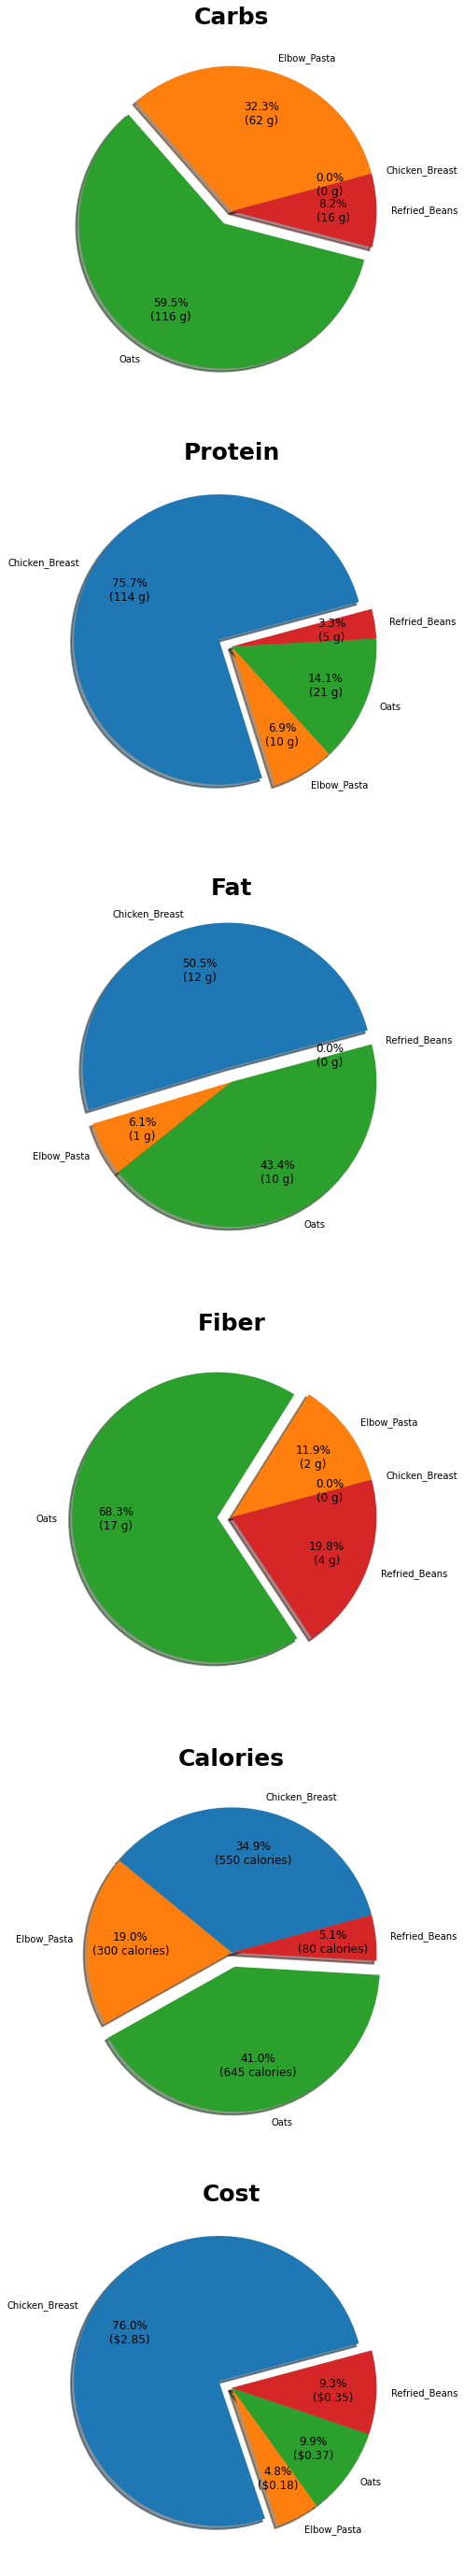

In [83]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

def func1(pct, allvals):
    absolute = pct/100.*np.sum(allvals)
    return "{:.1f}%\n(${:.2f})".format(pct, absolute)

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} calories)".format(pct, absolute)

def doColors(autotexts):
    for autotexts in autotexts:
        autotexts.set_color('black')
        #autotexts.size=15
        #autotexts.weight='bold'


explodeVal=0.1
autoWeightVal='normal'
labelVal='black'
autoTxtVal=12
titleVal=25
titleWeightVal='bold'
titleColor='black'
startAngleVal=15
        
print('\n\n')
pp.subplot(6,1,1)
pp.rcParams['text.color'] = labelVal
pp.title("Carbs",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(carbsData).index(np.max(carbsData))] = explodeVal
_,_,autotexts=pp.pie(carbsData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, carbsData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,2) 
pp.rcParams['text.color'] = labelVal
pp.title("Protein",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(proteinData).index(np.max(proteinData))] = explodeVal
_,_,autotexts=pp.pie(proteinData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, proteinData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)
 
pp.subplot(6,1,3) 
pp.rcParams['text.color'] = labelVal 
pp.title("Fat",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(fatData).index(np.max(fatData))] = explodeVal
_,_,autotexts=pp.pie(fatData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, fatData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,4) 
pp.rcParams['text.color'] = labelVal 
pp.title("Fiber",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(fiberData).index(np.max(fiberData))] = explodeVal
_,_,autotexts=pp.pie(fiberData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, fiberData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,5) 
pp.rcParams['text.color'] = labelVal
pp.title("Calories",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(calData).index(np.max(calData))] = explodeVal
_,_,autotexts=pp.pie(calData,explode=explode,labels=namesData, autopct=lambda pct: func2(pct, calData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,6)
pp.rcParams['text.color'] = labelVal
pp.title("Cost",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(costData).index(np.max(costData))] = explodeVal
_,_,autotexts=pp.pie(costData,explode=explode,labels=namesData, autopct=lambda pct: func1(pct, costData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

fig=pp.gcf()
fig.set_size_inches(50,50)

pp.show()